# Subtraction Example
### Images of NGC1341 from TOROS GW170104 response
This notebook provides an example of the process of image subtraction given in the context of searching for optical transients in galaxies. The target image is the one that (presumably) has the transient somewhere in it; the reference image would be data from a previous (or, in this case, future) time which would not contain the transient. Careful alignment and subtraction of these two images should, in principle, reveal the transient.

Note: These images do not contain a transient source, because the gravitational wave in this case was caused by the merger of two black holes.

### Load modules
This part is crucial since there are many dependencies for the example to work. Seek help from me if you cannot get these to work.

In [18]:
from astropy.io import fits
import aplpy
import astroalign as aa
import matplotlib.pyplot as plt
import numpy as np
import ois
%matplotlib inline

### Load target and reference frames
Be sure to change the directories to your local setup. The subdirectory structure will be the same.

In [3]:
tar = fits.getdata("/home/rcamuccio/Documents/pipeline-tutorials/data/subtraction/ngc1341-20170113-stack.fit")
ref = fits.getdata("/home/rcamuccio/Documents/pipeline-tutorials/data/subtraction/ngc1341-20170121-stack.fit")

### Display the target and reference frames
These frames were taken by the EABA 1.54-m telescope in response to GW170104. The target frame was taken on 13 Jan 2017. The reference frame was taken on 21 Jan 2017. These frames have already been reduced and stacked.

INFO: Auto-setting vmin to  9.277e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.316e-02 [aplpy.core]


INFO: Auto-setting vmin to  2.956e-03 [aplpy.core]
INFO: Auto-setting vmax to  9.178e-03 [aplpy.core]


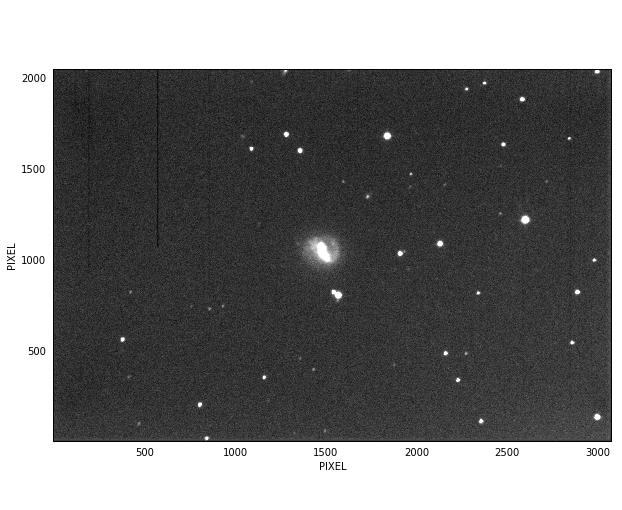

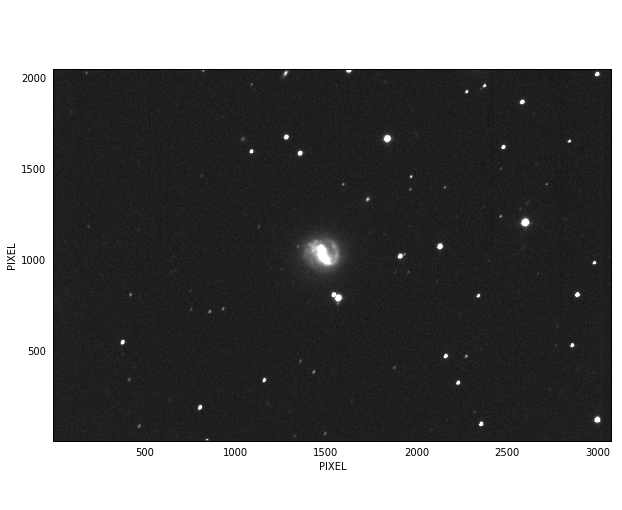

In [17]:
fig = aplpy.FITSFigure(tar)
fig.show_grayscale()

fig = aplpy.FITSFigure(ref)
fig.show_grayscale()

### Align the reference frame to the target frame
This method of subtraction uses the code Astroalign, which employs a 3-point asterism method to align frames. This step is important because, without proper alignment, any subtraction attempts will be useless. In this particular example, the alignment differences are small and hard to notice, but they are there.

The details are given in an example found here: http://toros-astro.github.io/astroalign/.

In [8]:
ref_aligned = aa.register(ref.astype("float64"), tar.astype("float64"))

### Display the aligned frames
Again, the difference is probably not noticeable, but now the images should be aligned and ready for subtraction. Please note: another method to align images would be to attach a World Coordinate System (WCS) frame to these images and align via the coordinates. A separate example will be given for this particular approach.

INFO: Auto-setting vmin to  9.277e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.316e-02 [aplpy.core]


INFO: Auto-setting vmin to  3.011e-03 [aplpy.core]
INFO: Auto-setting vmax to  9.026e-03 [aplpy.core]


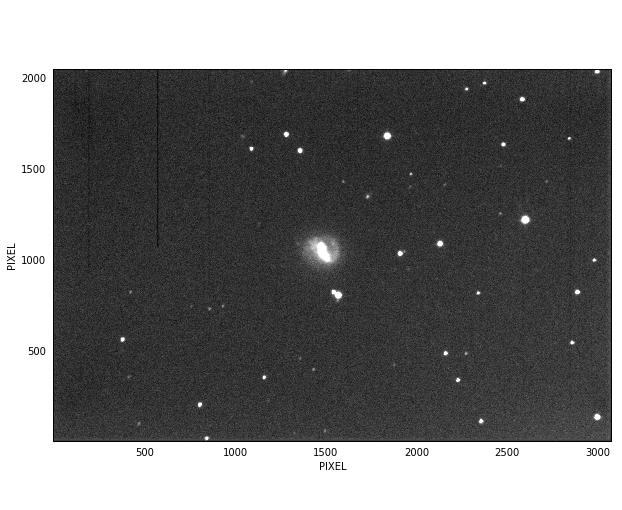

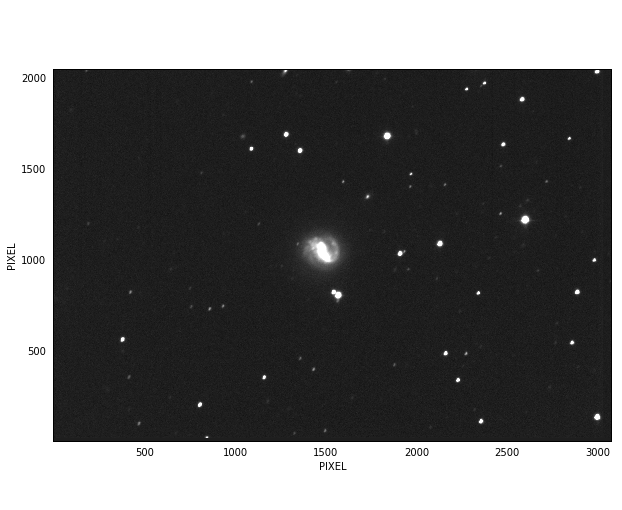

In [19]:
fig = aplpy.FITSFigure(tar)
fig.show_grayscale()

fig = aplpy.FITSFigure(ref_aligned)
fig.show_grayscale()

### Subtract the frames
This part uses the Optimal Image Subtraction (OIS) package developed by M. Beroiz. The parameters you should begin to tweak are the 'method' and 'kernelshape' parameters. I find Bramich to be the best overall, but each method has their own advantages and drawbacks. The kernel shape size is directly proportional to the subtraction accuracy (i.e. the bigger the kernel size, the better the subtraction will be).

Please note that this step will use a good bit of time and resources. I'm running Ubuntu 18.04 with 12 GB ram. Any kernal shape over 11x11 crashes my computer, so keep that in mind. Know thy hardware! If anything, start with a 1x1 kernel and work you're way up from there. An 11x11 kernel on my machine takes about 7 minutes.

For information about how to use it: https://optimal-image-subtraction.readthedocs.io/en/stable/.

In [21]:
%%time
diff, opt, krn, bkg = ois.optimal_system(tar, ref_aligned, bkgdegree=0, method="Bramich", kernelshape=(1, 1))

CPU times: user 444 ms, sys: 460 ms, total: 903 ms
Wall time: 902 ms


### Display the difference frame
Note the imperfection of the star and galaxy subtraction. The best approach to remove the galaxy would be to apply a numerical model and subtract that from each frame first. At this point, we would run a source extraction algorithm on this frame to pull out all the bogus (and hopefully

INFO: Auto-setting vmin to -6.054e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.792e-04 [aplpy.core]


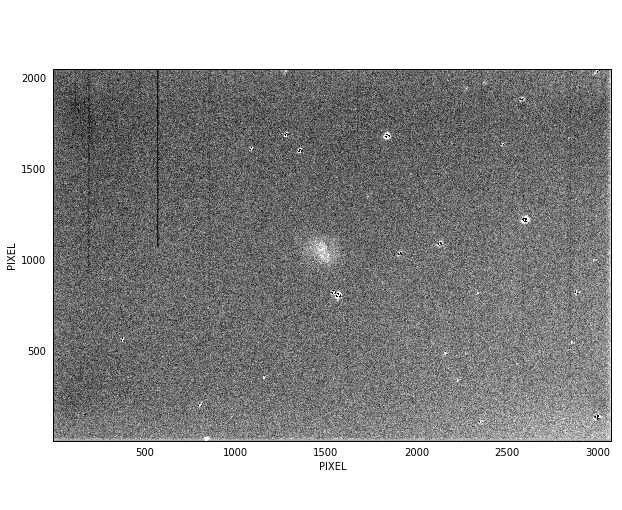

In [15]:
fig = aplpy.FITSFigure(diff)
fig.show_grayscale()
hdu = fits.PrimaryHDU(diff)
#hdu.writeto("ngc1341-subtract.fit", overwrite=True)

INFO: Auto-setting vmin to -2.154e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.684e-01 [aplpy.core]


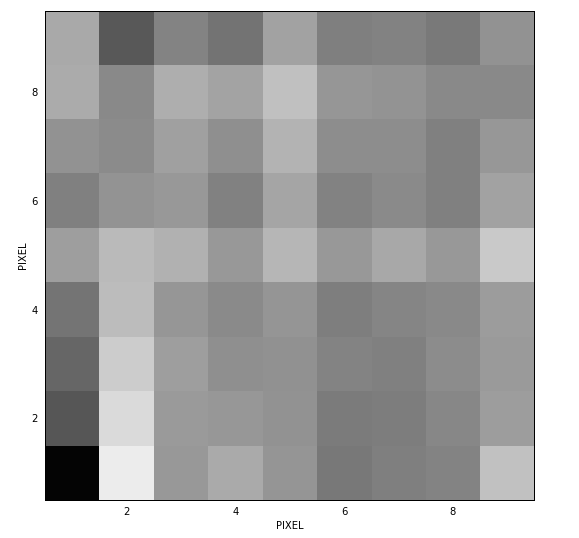

In [16]:
fig = aplpy.FITSFigure(krn)
fig.show_grayscale()